In [2]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

C:\Users\GIRIRAJ ROY\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
df=pd.read_csv(r"C:\Users\GIRIRAJ ROY\Downloads\bengaluru_house_prices.csv")

In [4]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df.shape

(13320, 9)

In [6]:
df.groupby('area_type')['area_type'].agg('count')


area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [7]:
df1=df.drop(['area_type','society','balcony','availability'],axis='columns')
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [8]:
#data cleaning process
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
df2=df1.dropna()
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [10]:
df2.shape

(13246, 5)

In [11]:
#as we can see that in the size column sometimes its written that 4 bdrooms and smetimes tis written 3
#4 bhk hence to solve this we will apply  function that will take into account
#only the first string as the numeric value and store it asa a avalue for the size column 

In [12]:
df2['size'].unique()
#gives all the unique values present in the size column

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [13]:
df2['bhk']=df2['size'].apply(lambda x: int(x.split(' ')[0]))
#splits the values in the size column on (" ") and the first element id to be taken into consideration for the 
#vlae of the bhk column created

C:\Users\GIRIRAJ ROY\AppData\Local\Temp\ipykernel_9684\1681632236.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk']=df2['size'].apply(lambda x: int(x.split(' ')[0]))


In [14]:
df2.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [15]:
df2['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [16]:
df2[df2.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [17]:
#this looks like a glitch because a 2400 sqft room cannot have 43 bedrooms 

In [18]:
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [19]:
#converting values which are given in form of a range into single nmbers 
#like 1133-1384


In [20]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [21]:
df2[-df2['total_sqft'].apply(is_float)].head(10)
#'-' sign return false values of the function implemented inside  

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [22]:
#now we encounter anothere problem that is the total_sqft also has several datapoints where 
#34.46 sq meter this kinda values aint uniform 

In [23]:
#first we will take the datapoints on the total_sqft which is like a range 
#then we will take the average value 

In [24]:
def convert_sqft_to_num(x):
    tokens=x.split('-')
    if(len(tokens))==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [25]:
convert_sqft_to_num('2400')

2400.0

In [26]:
convert_sqft_to_num('2300-2700')

2500.0

In [27]:
df3=df2.copy()
df3['total_sqft']=df3['total_sqft'].apply(convert_sqft_to_num)
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [28]:
df3.loc[410]

location      Kengeri
size            1 BHK
total_sqft        NaN
bath              1.0
price            18.5
bhk                 1
Name: 410, dtype: object

In [29]:
#we are creating a new dataframe in each step of our data procesing pipeline 

In [30]:
#our data s cleaned now , now we will go through some feature engineering techniques 

In [31]:
df4=df3.copy()

In [32]:
#we will create a price per sqft column 

In [33]:
df4['price_per_sqft']=df3['price']*100000/df4['total_sqft']

In [34]:
df4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [35]:
#locaitons is a ctegorical feature 

In [36]:
len(df4.location.unique())

1304

In [37]:
#as the types of locaions are very large hence 
#we cant use one hot encoding 
#this is cause dimensionality curse and we need to solve it 

In [38]:
#to find same locations 
#first we have removed the extra space in the starting and the end of the locaiotn 

df4.location=df4.location.apply(lambda x: x.strip())

In [39]:
location_stats=df4.groupby('location')

In [40]:
location_stats=df4.groupby('location')['location'].agg('count')

In [41]:
location_stats[:50]

location
1 Annasandrapalya                                   1
1 Giri Nagar                                        1
1 Immadihalli                                       1
1 Ramamurthy Nagar                                  1
12th cross srinivas nagar banshankari 3rd stage     1
1A Block Koramangala                                1
1Channasandra                                       1
1Hanuman Nagar                                      1
1Hoysalanagar                                       1
1Kasavanhalli                                       1
1st Block BEL Layout                                2
1st Block HBR Layout                                3
1st Block HRBR Layout                               8
1st Block Jayanagar                                14
1st Block Koramangala                              10
1st Phase JP Nagar                                 25
1st Stage Domlur                                    1
1st Stage Indira Nagar                              5
1st Stage Radha Kri

In [42]:
location_stats=df4.groupby('location')['location'].agg('count').sort_values(ascending=False)

In [43]:
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [44]:
#now we wll segregate locaitons like that , any locaitons havng less than 10 datapoints
#will be treated as other location 

In [45]:
len(location_stats[location_stats<10])

1039

In [46]:
location_stats_less_than_10=location_stats[location_stats<=10]

In [47]:
location_stats_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [48]:
len(df4.location.unique())

1293

In [49]:
df4.location=df4.location.apply(lambda x:'other' if x in location_stats_less_than_10 else x)
len(df4.location.unique())

242

In [50]:
df4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [51]:
df4

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,other,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [52]:
#we will ow do outliers detection and removal 
#outliers are datapoints which are data errors we need to modify or remove them 

In [53]:
#what is the typical sqft per bedroom?

In [54]:
df4[df4.total_sqft/df4.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [55]:
#a 600 sqft home cannot have a 8 bedrooms hence we have to remonve this datapioints

In [56]:
df4.shape

(13246, 7)

In [57]:
df5=df4[~(df4.total_sqft/df4.bhk<300)]
df5.shape

(12502, 7)

In [58]:
df5.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [59]:
#we see that min is 267 per sqft , lathough we know that getting a property in bangalore with 267 sqft is very unlikely 

In [60]:
#also the max is very high , hence we will remove the extreme cases 

In [61]:
#we will remove some the price per sqft per location 

In [62]:
#we will calculate mean and standard deviation and then filter out which has more than one standard deviation 

In [63]:
#our datapoints should be lying between mean and one standard deviation


In [64]:
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key ,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-st))&(subdf.price_per_sqft<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [65]:
df6=remove_pps_outliers(df5)
df6.shape

(10241, 7)

In [66]:
#now there are some datapoints where features are all same but the price is wayy too different 
#we need to isualise and correct them using scatterplot 

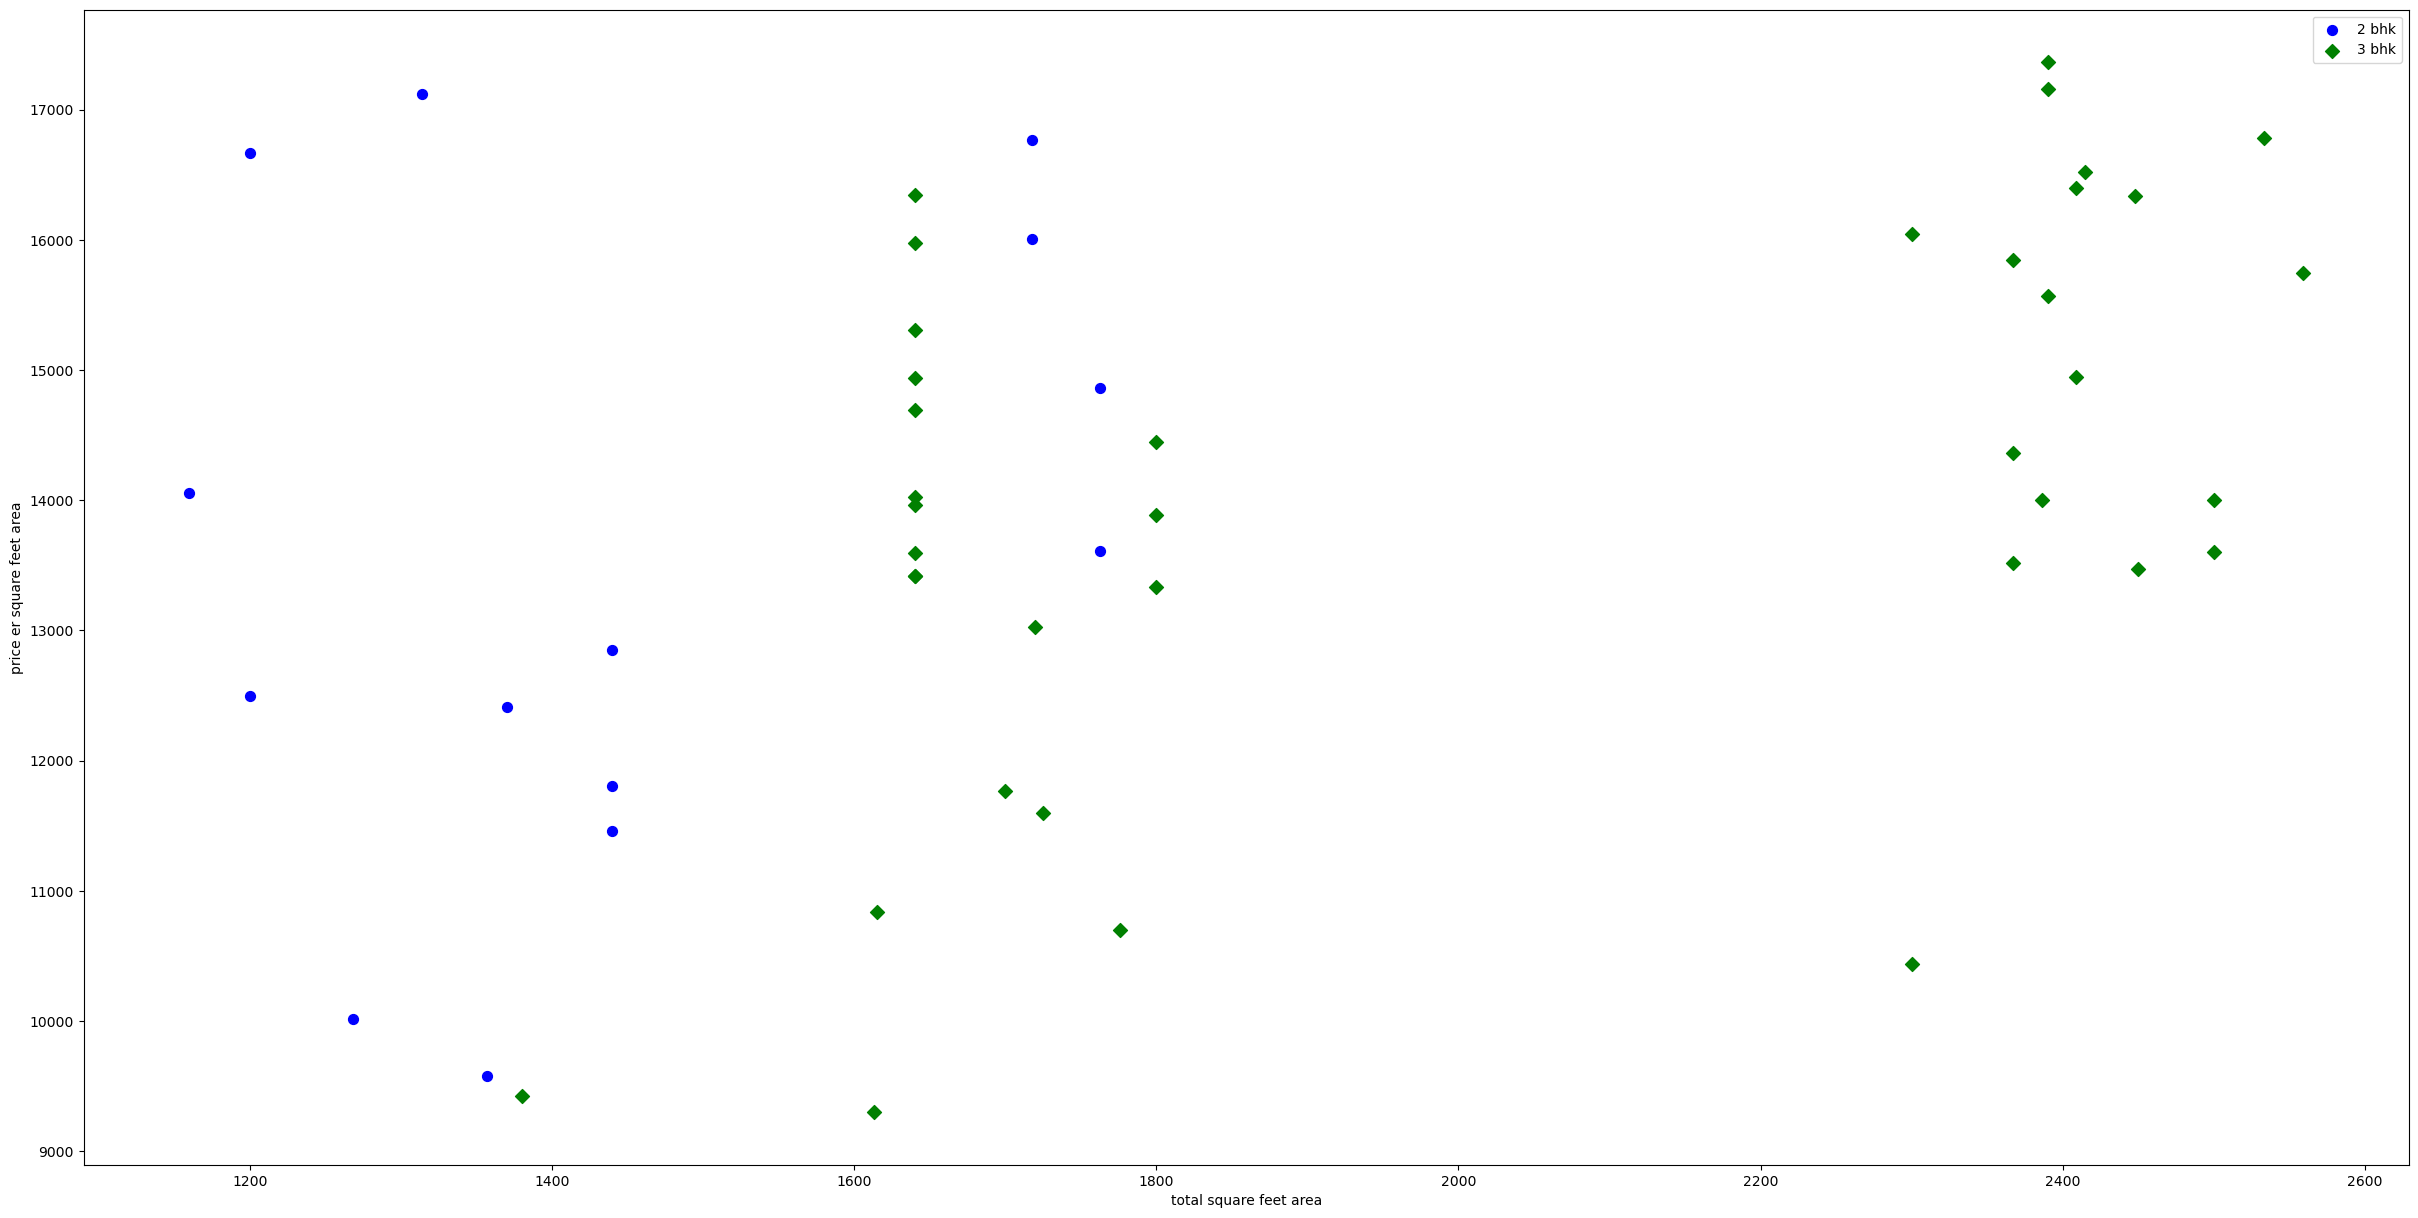

In [67]:
def plot_scatter_chart(df,location):
    bhk2=df[(df.location==location)&(df.bhk==2)]
    bhk3=df[(df.location==location)&(df.bhk==3)]
    matplotlib.rcParams['figure.figsize']=(30,15)
    plt.scatter(bhk2.total_sqft,bhk2.price_per_sqft,color='blue',label='2 bhk' ,s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price_per_sqft,marker='D',color='green',label='3 bhk' ,s=50)
    plt.xlabel("total square feet area")
    plt.ylabel("price er square feet area")
    plt.legend()
plot_scatter_chart(df6,'Rajaji Nagar')

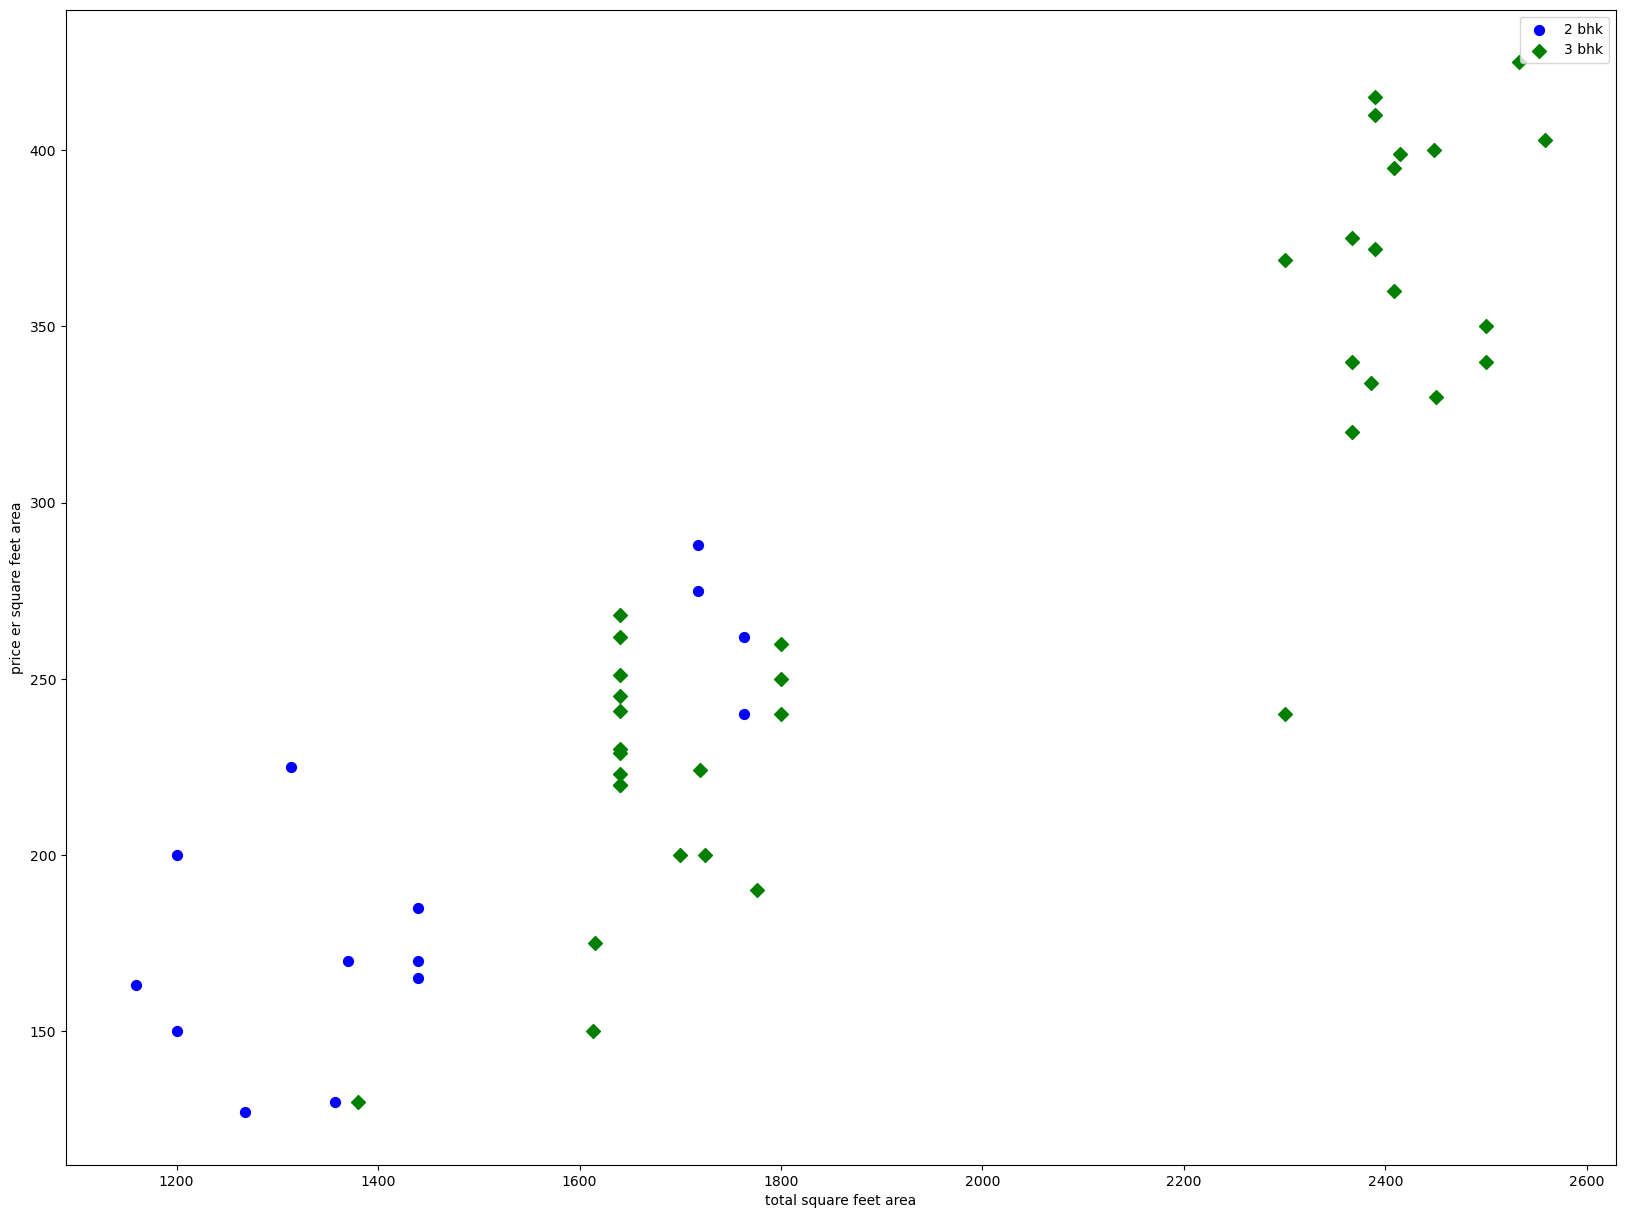

In [68]:
def plot_scatter_chart(df,location):
    bhk2=df[(df.location==location)&(df.bhk==2)]
    bhk3=df[(df.location==location)&(df.bhk==3)]
    matplotlib.rcParams['figure.figsize']=(20,15)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 bhk' ,s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='D',color='green',label='3 bhk' ,s=50)
    plt.xlabel("total square feet area")
    plt.ylabel("price er square feet area")
    plt.legend()
plot_scatter_chart(df6,'Rajaji Nagar')

In [69]:
#we see that for approx 1700 square feet area there are too many prices 
#also in tha same place price of to bedroom price is higher than threee

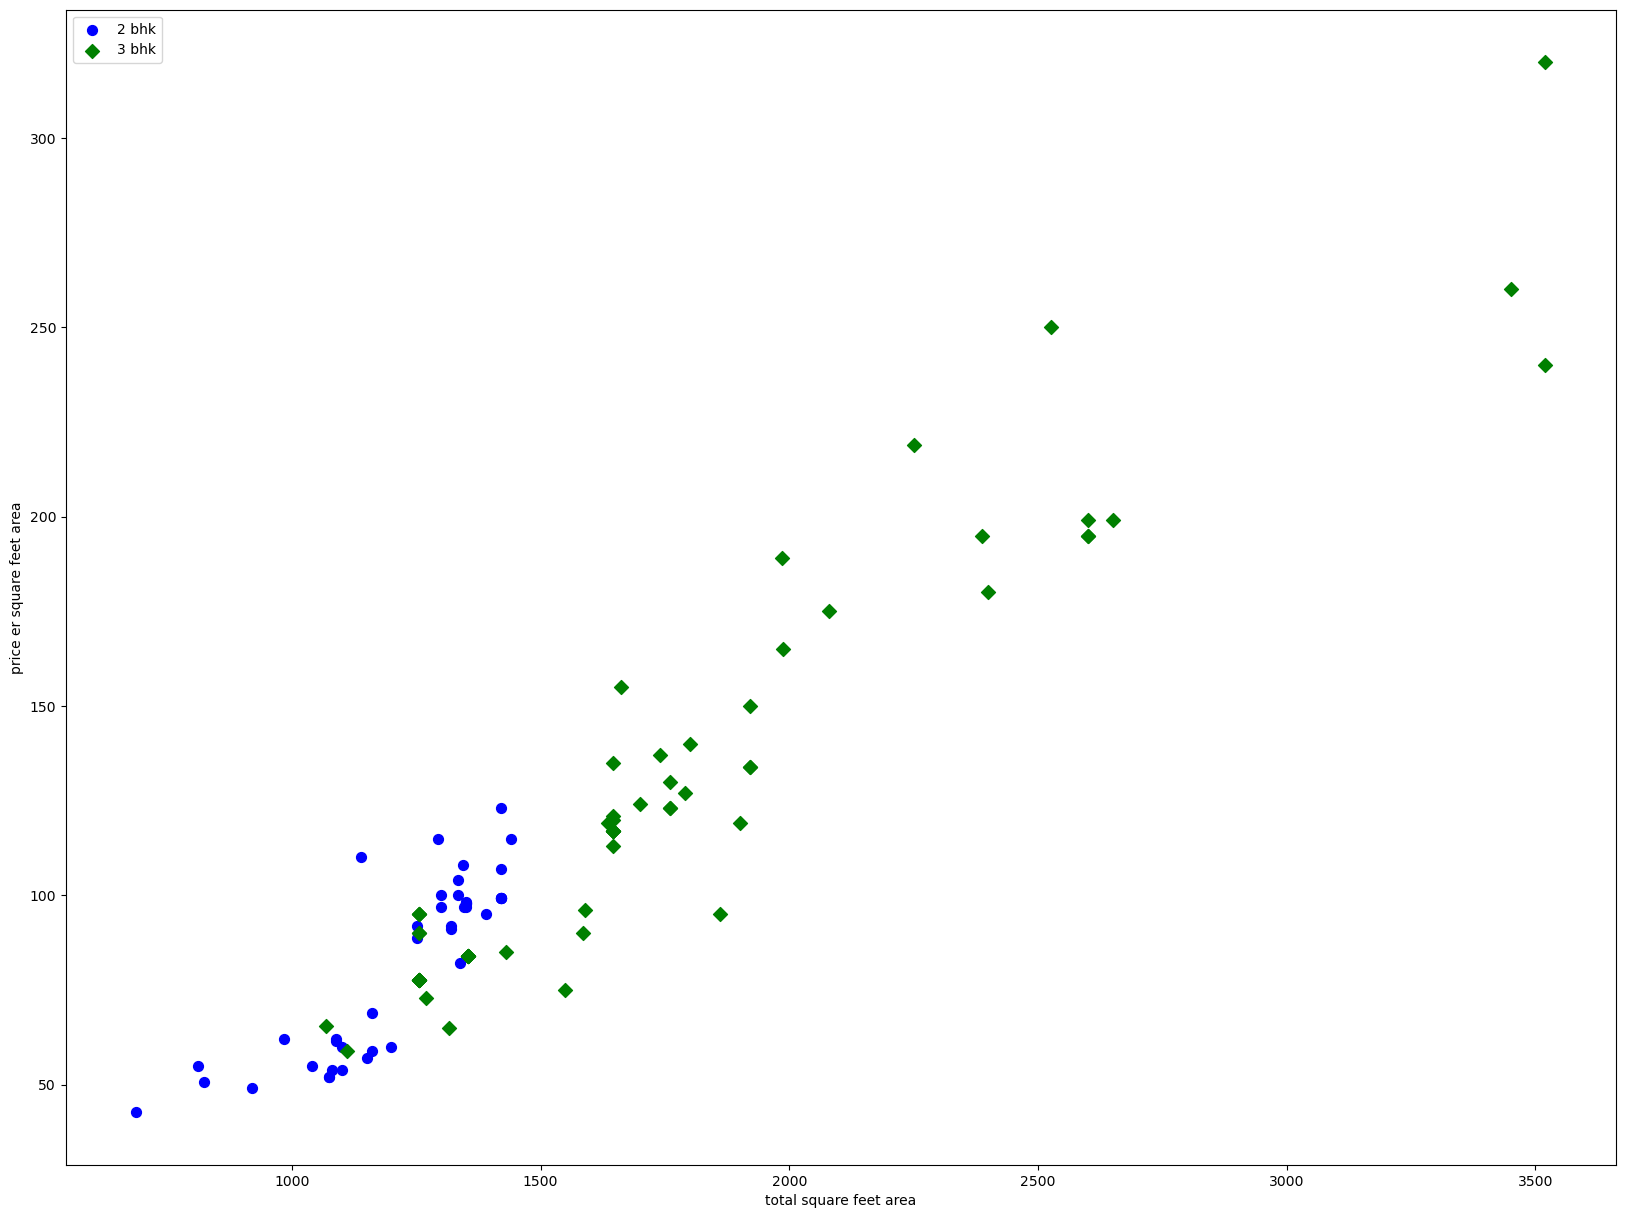

In [70]:
def plot_scatter_chart(df,location):
    bhk2=df[(df.location==location)&(df.bhk==2)]
    bhk3=df[(df.location==location)&(df.bhk==3)]
    matplotlib.rcParams['figure.figsize']=(20,15)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 bhk' ,s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='D',color='green',label='3 bhk' ,s=50)
    plt.xlabel("total square feet area")
    plt.ylabel("price er square feet area")
    plt.legend()
plot_scatter_chart(df6,'Hebbal')

In [71]:
#here also there are places where price of to bedrooms is hegher htan three

In [72]:
#we should also remove properties where for same location , the price of(for example ) 3 bedroom apartment
#is less than 2 bedroom apartment (with same sqft area) what we will do is for a given location we will build a dictionary 
#for stats per bhk ie
#for ex if price of 2 bhk is more than a mean value it wont be considered 

In [73]:
#{
#    '1':{
#        'mean':4000,
#        'std':2000,
#        'count:34'
#    }
#    '2':{
#        'mean':4300,
#        'std':2300,
#        'count':22
#     }
#}
#now we can reomve 2 bhk apartments whose preice_per_sqft is less than mean price_per_sqft of 1 bhk apartments

In [74]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df7 = remove_bhk_outliers(df6)
# df8 = df7.copy()
df7.shape

(7329, 7)

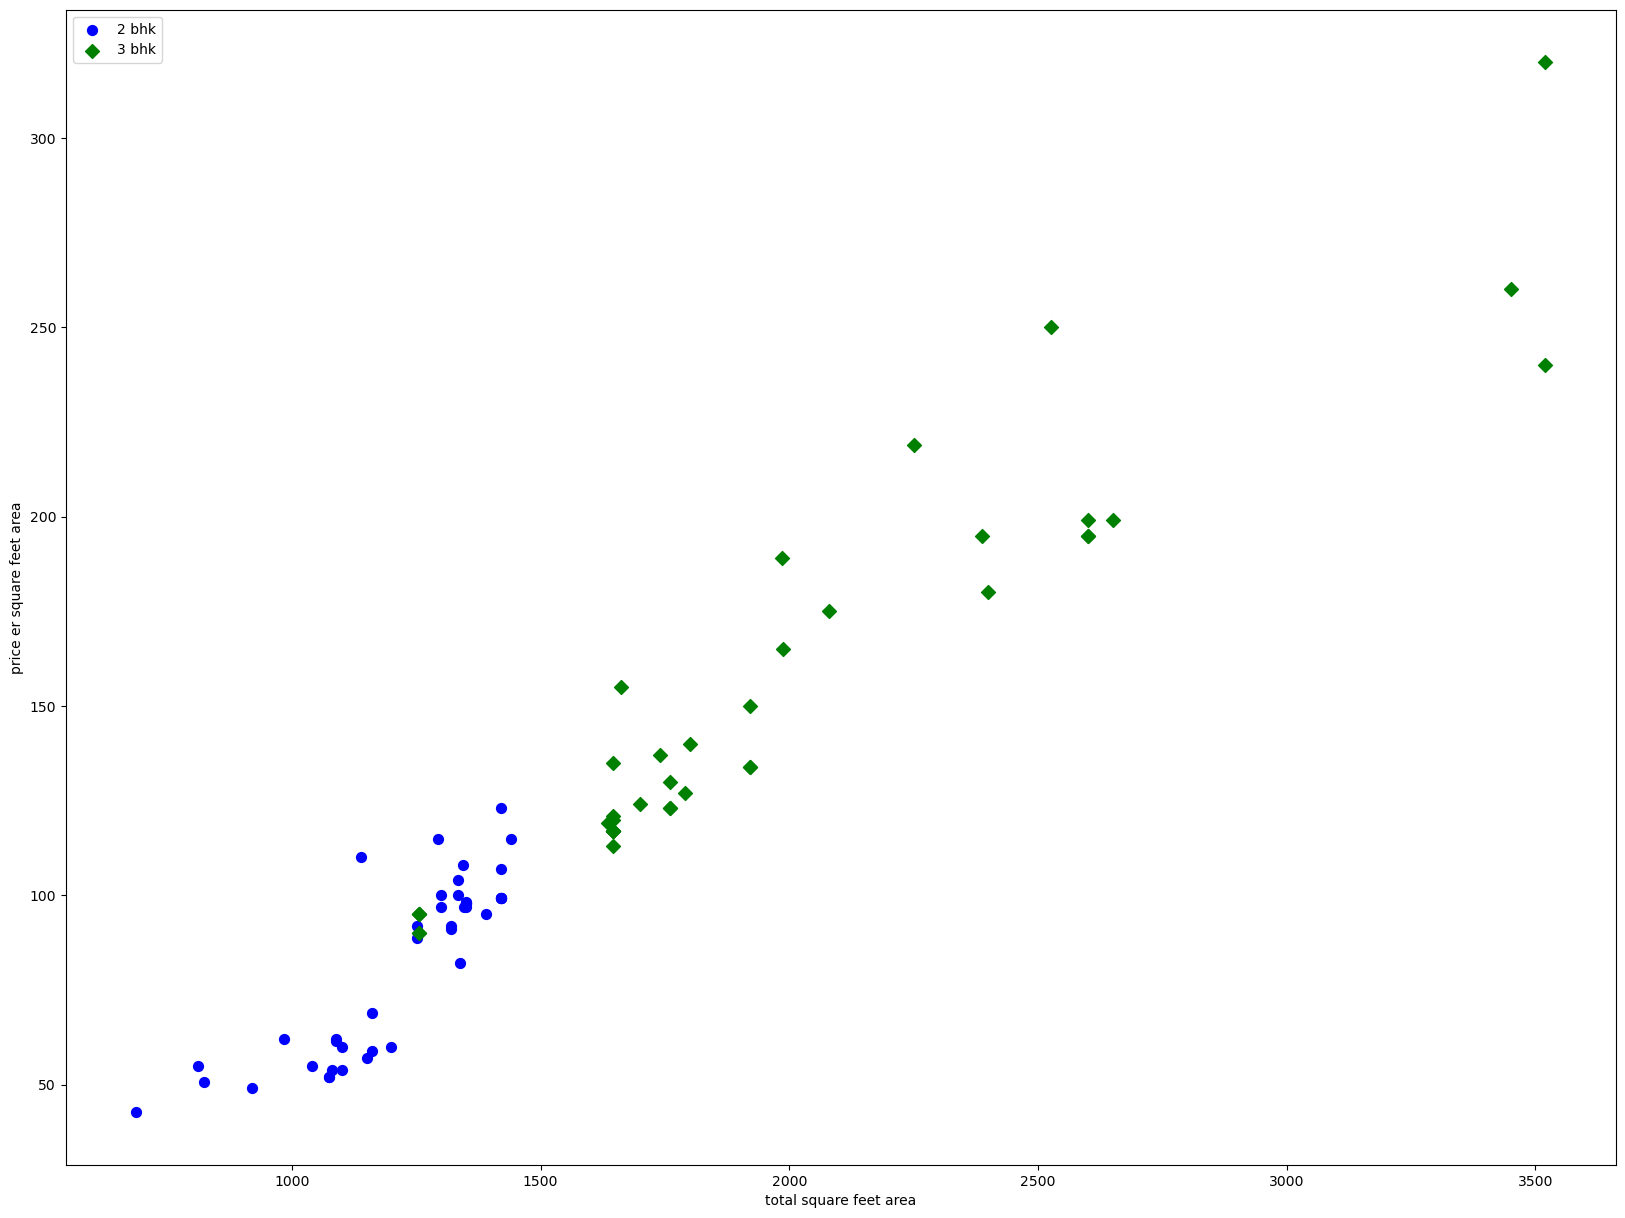

In [75]:
def plot_scatter_chart(df,location):
    bhk2=df[(df.location==location)&(df.bhk==2)]
    bhk3=df[(df.location==location)&(df.bhk==3)]
    matplotlib.rcParams['figure.figsize']=(20,15)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 bhk' ,s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='D',color='green',label='3 bhk' ,s=50)
    plt.xlabel("total square feet area")
    plt.ylabel("price er square feet area")
    plt.legend()
plot_scatter_chart(df7,'Hebbal')

In [76]:
#still there are some abnormalities but its fine 

In [77]:
#how many properties in persqft area

Text(0, 0.5, 'Count')

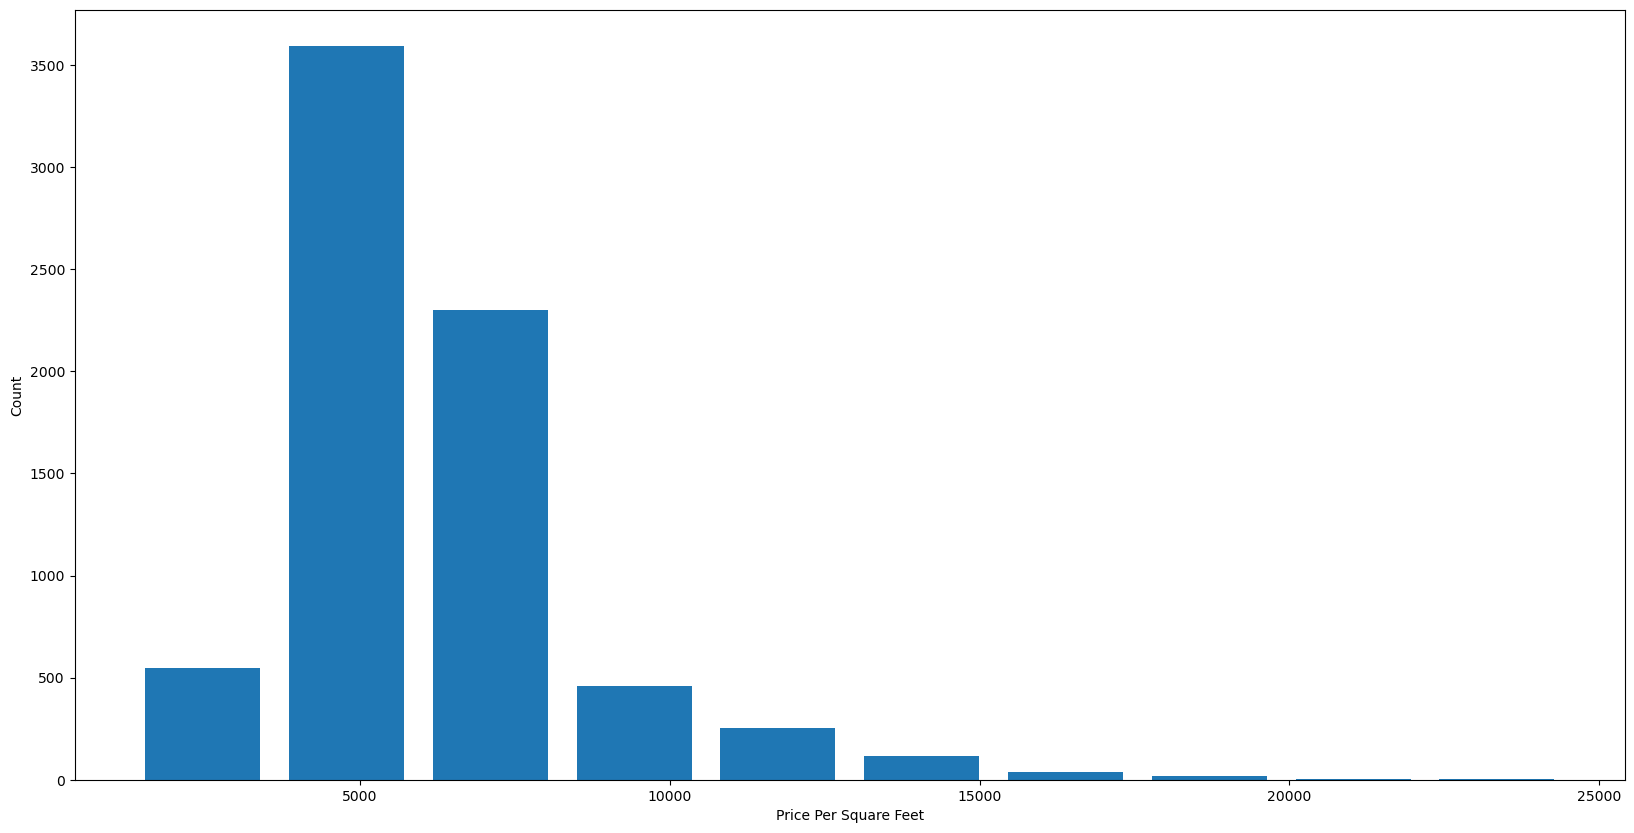

In [78]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df7.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [79]:
df7.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [80]:
#some of this has >10 bathrooms
#no. of bathrooms >> no of bedroom is a anomaly 
#so remove it 

Text(0, 0.5, 'Count')

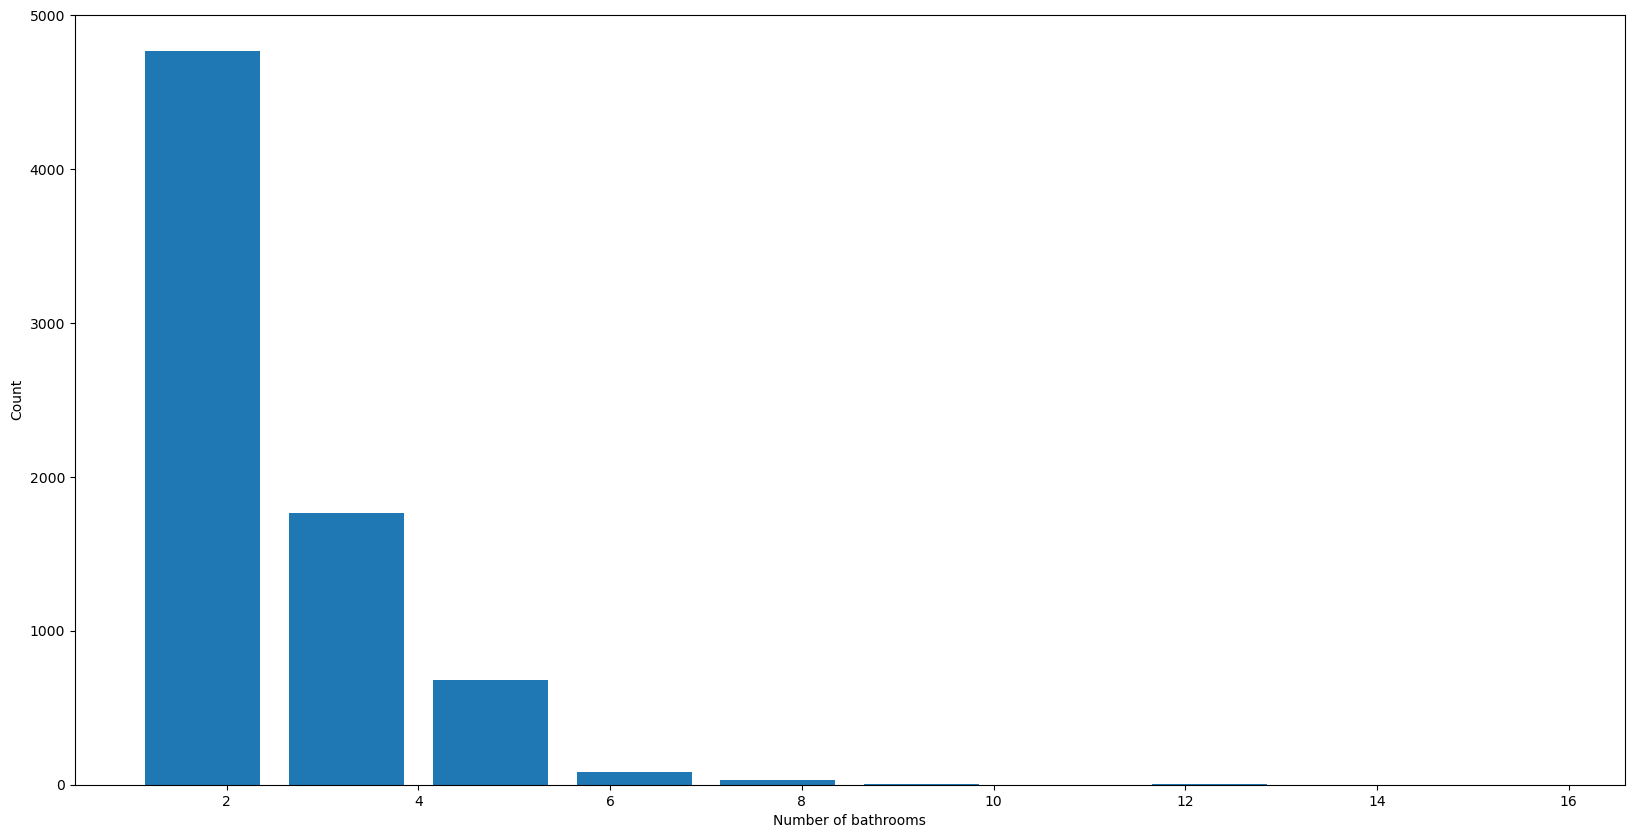

In [81]:
plt.hist(df7.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")


In [82]:
df7[df7.bath>df7.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [83]:
df8= df7[df7.bath<df7.bhk+2]
df8.shape

(7251, 7)

In [84]:
#now we will go to machine larning training 
df9 = df8.drop(['size','price_per_sqft'],axis='columns')
df9.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


In [85]:
#NOW MY DATA IS SET OF BEST MODEL BUILDING 

In [86]:
#we will convert text column to one hot encoding

In [87]:
dummies=pd.get_dummies(df9.location)

In [88]:
df10=pd.concat([df9,dummies],axis='columns')

In [89]:
df10[:20]

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1st Block Jayanagar,2850.0,4.0,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,235.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,1200.0,2.0,130.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,1235.0,2.0,148.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,1st Block Jayanagar,2750.0,4.0,413.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,1st Block Jayanagar,2450.0,4.0,368.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,1st Phase JP Nagar,1875.0,3.0,167.0,3,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,1st Phase JP Nagar,1500.0,5.0,85.0,5,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10,1st Phase JP Nagar,2065.0,4.0,210.0,3,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [90]:
df10=pd.concat([df9,dummies.drop('other',axis='columns')],axis='columns')
df10.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,235.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,1200.0,2.0,130.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,1235.0,2.0,148.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [140]:
df11=df10.drop('location',axis='columns')

In [141]:
df11.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,194.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,235.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,130.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,148.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [142]:
df11.shape

(7251, 245)

In [143]:
x=df11.drop('price',axis='columns')
x.head()
z=x.copy()

In [144]:
print(type(z))
print(type(x))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [145]:
y=df11.price

In [146]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [147]:
print(type(z))
print(type(x))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [148]:
from sklearn.linear_model import LinearRegression

In [149]:
lr_clf=LinearRegression()
lr_clf.fit(x_train,y_train)
lr_clf.score(x_test,y_test)

0.845227769787429

In [150]:
#we will onw use k fold cross validation

In [151]:
#we will import shuffle split so that each disribution will b euniform 

In [152]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=10)

cross_val_score(LinearRegression(),x,y,cv=cv)

array([0.84522777, 0.80004632, 0.88682995, 0.842265  , 0.86250633])

In [153]:
print(type(z))
print(type(x))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [154]:
#what will give me a best score 
#we will do grid search cv


In [155]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(x,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False],
                'positive': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x,y)

C:\Users\GIRIRAJ ROY\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\GIRIRAJ ROY\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\GIRIRAJ ROY\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\GIRIRAJ ROY\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\GIRIRAJ RO

,model,best_score,best_params
0,linear_regression,0.819001,"{'fit_intercept': False, 'positive': False}"
1,lasso,0.687430,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.724731,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [159]:
print(type(z))
print(type(x))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [160]:
x.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [163]:
print(type(z))
print(type(x))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [162]:
np.where(x.columns=='2nd Phase Judicial Layout')[0][0]
#shows the index of 2nd phase judicial layout

5

In [177]:
print(type(z))
print(type(x))

<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>


In [178]:
z=x.copy()

In [195]:

def predict_price(location,sqft,bath,bhk):    
    global z
    global x
    loc_index = np.where((x.columns)==location)[0][0]

    t = np.zeros(len(x.columns))
    t[0] = sqft
    t[1] = bath
    t[2] = bhk
    if loc_index >= 0:
        t[loc_index] = 1
   
    return lr_clf.predict([t])[0]

In [197]:
predict_price('Indira Nagar',1000, 3, 3)

C:\Users\GIRIRAJ ROY\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


184.58430202033549

In [199]:
predict_price('Indira Nagar',1000, 3, 3)

C:\Users\GIRIRAJ ROY\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


184.58430202033549

In [202]:
predict_price('Indira Nagar',1000, 3, 3)

C:\Users\GIRIRAJ ROY\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


184.58430202033549

In [203]:
#impoerting model to pickle file


In [204]:
import pickle
with open('bangalore_house_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [205]:
import json 
columns={
    'data_columns':[col.lower() for col in x.columns]
}
with open("columns.json","w")as f:
    f.write(json.dumps(columns))